## SRM 641 Python Week 4: Data Visualization with Seaborn

`Seaborn` is a library for making statistical graphics in Python. It builds on top of `matplotlib` and integrates closely with `pandas` data structures.

Seaborn helps you explore and understand your data. Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots.

With data that requires aggregation or summarization before making a plot, using the seaborn package can make things much simpler (install it with conda install seaborn, if not yet installed)

### Seaborn Versus Matplotlib
Here is an example of a simple random-walk plot in `Matplotlib`, using its classic plot formatting and colors. We start with the typical imports:

In [1]:
# Load the libraries

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np
import pandas as pd

In [2]:
# Create some data

rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

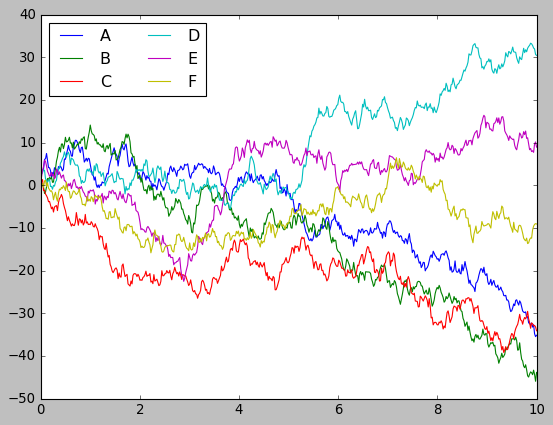

In [3]:
# Plot the data with Matplotlib defaults

plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

The result contains all the information we'd like it to convey, however, it does so in a way that is not all that aesthetically pleasing, and even looks a bit old-fashioned in the context of 21st-century data visualization. 

Now let's take a look at how it works with `Seaborn`. Seaborn has many of its own high-level plotting routines, but it can also overwrite Matplotlib's default parameters and in turn get even simple Matplotlib scripts to produce vastly superior output. We can set the style by calling Seaborn's `set()` method. By convention, Seaborn is imported as `sns`:

In [4]:
# Import seaborn

import seaborn as sns
sns.set() #loads seaborn's default theme and color palette to the session

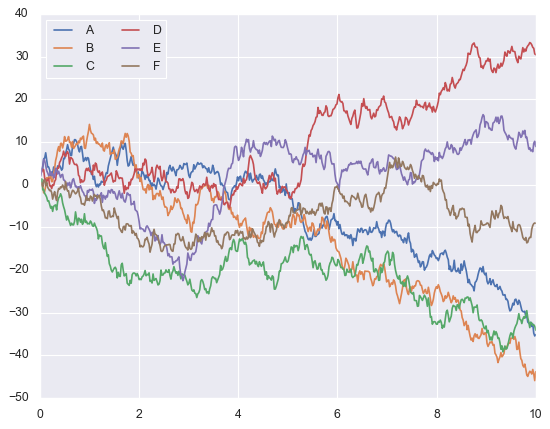

In [5]:
# same plotting code as above, different plot that looks much better.

plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Behind the scenes, seaborn uses matplotlib to draw its plots.

## Seaborn Plots

The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

Let's take a look at a few of the datasets and plot types available in Seaborn. Note that all of the following could be done using Matplotlib commands (this is, in fact, what Seaborn does under the hood) but the Seaborn API is much more convenient.

### Histograms, KDE, and densities

Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables. We have seen that this is relatively straightforward in Matplotlib:

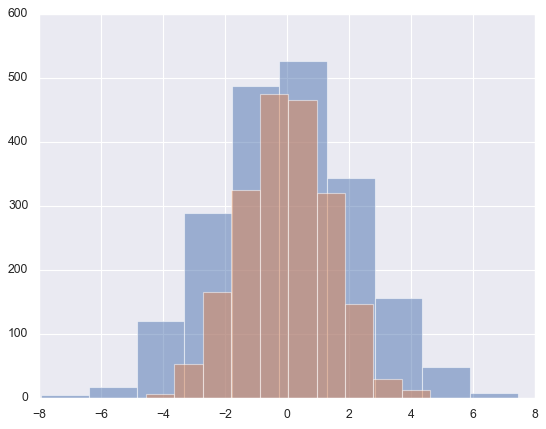

In [8]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], alpha=0.5)

Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with `sns.kdeplot`:

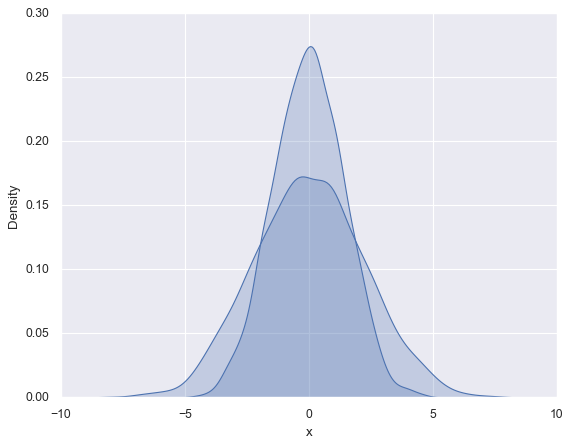

In [16]:
for col in 'xy':
    sns.kdeplot(data[col], fill=True)

In [14]:
#import warnings
#warnings.filterwarnings('ignore')

### Pair plots

When you generalize joint plots to datasets of larger dimensions, you end up with pair plots. This is very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other.

We'll use the well-known Iris dataset, which lists measurements of petals and sepals of three iris species:

In [18]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Visualizing the multidimensional relationships among the samples is as easy as calling `sns.pairplot`:

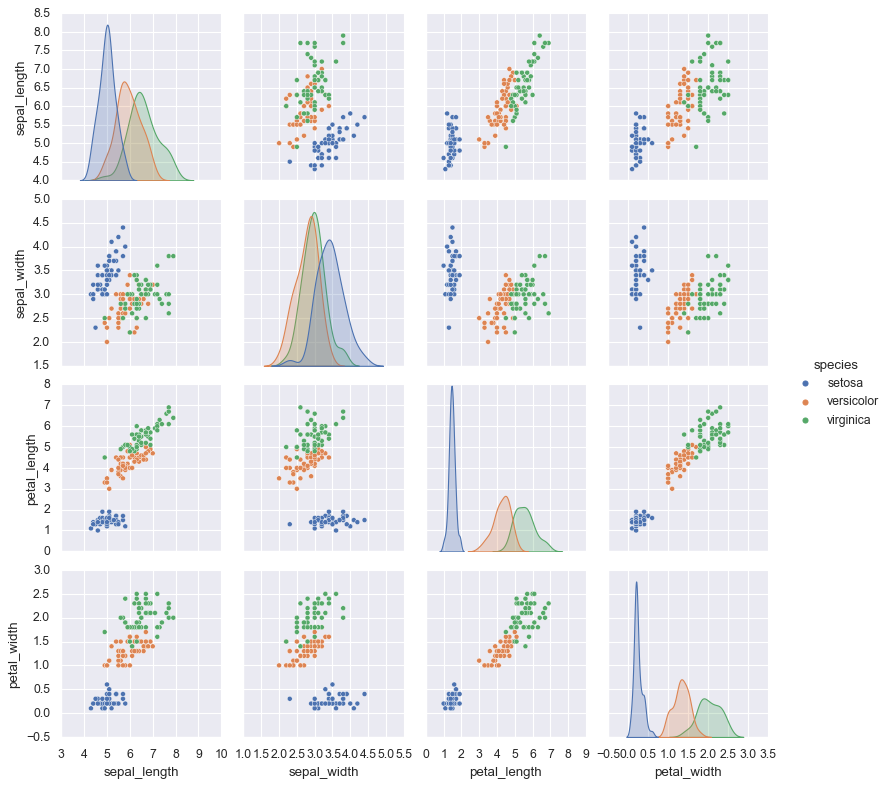

In [19]:
sns.pairplot(iris, hue='species', size=2.5) #can add ; add the end of code to not show the message, only plot

### Faceted histograms

Sometimes the best way to view data is via histograms of subsets. Seaborn's `FacetGrid` makes this extremely simple. We'll take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data:

In [20]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


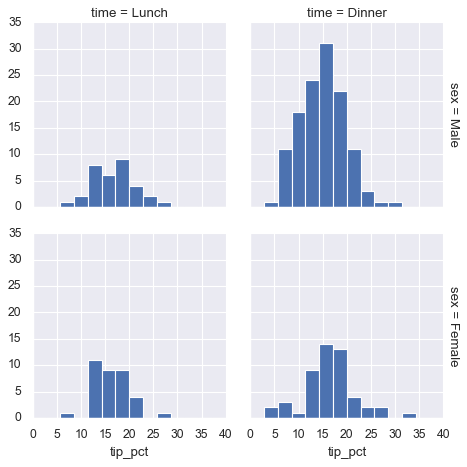

In [21]:
# Let's plot a histogram using FacetGrid

tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15))

<Axes: ylabel='Frequency'>

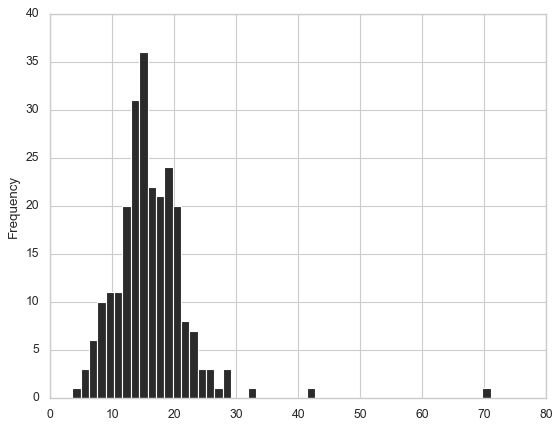

In [32]:
# plot a histogram

tips["tip_pct"].plot.hist(bins=50)

A related plot type is a density plot, which is formed by computing an estimate of a continuous probability distribution that might have generated the observed data.

<Axes: ylabel='Density'>

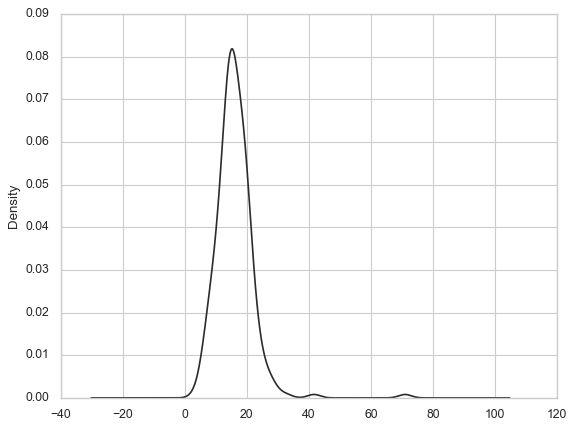

In [33]:
tips["tip_pct"].plot.density()

### Bar plots

Bar plots can be plotted using `sns.barplot`.

<Axes: xlabel='tip_pct', ylabel='day'>

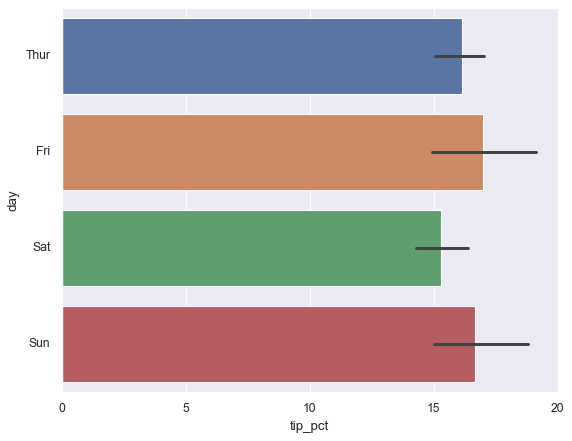

In [26]:
sns.barplot(x="tip_pct", y="day", data=tips, orient="h")

Plotting functions in seaborn take a data argument, which can be a pandas DataFrame. The other arguments refer to column names. Because there are multiple observations for each value in the day, the bars are the average value of tip_pct. The black lines drawn on the bars represent the 95% confidence interval (this can be configured through optional arguments).

`seaborn.barplot` has a hue option that enables us to split by an additional categorical value

<Axes: xlabel='tip_pct', ylabel='day'>

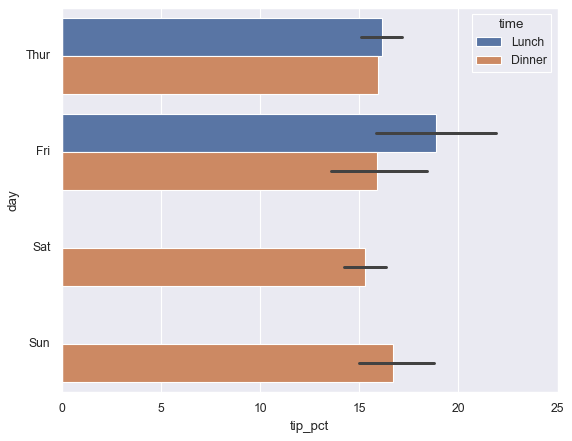

In [29]:
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")

Notice that seaborn has automatically changed the aesthetics of plots: the default color palette, plot background, and grid line colors. You can switch between different plot appearances using `seaborn.set_style`:

In [30]:
sns.set_style("whitegrid")

When producing plots for black-and-white print medium, you may find it useful to set a greyscale color palette:

In [31]:
sns.set_palette("Greys_r") #this changes the format for the rest of the plots

## Lets visualize our earthquake and Facebook data using Seaborn

In [34]:
# Load the data

df_fb = pd.read_csv('Data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
df_quakes = pd.read_csv('earthquakes.csv')

## Visualize the data

### boxenplot()

The `boxenplot()` function creates an enhanced box plot that shows additional quantiles:

Text(0.5, 1.0, 'Comparing earthquake magnitude by magType')

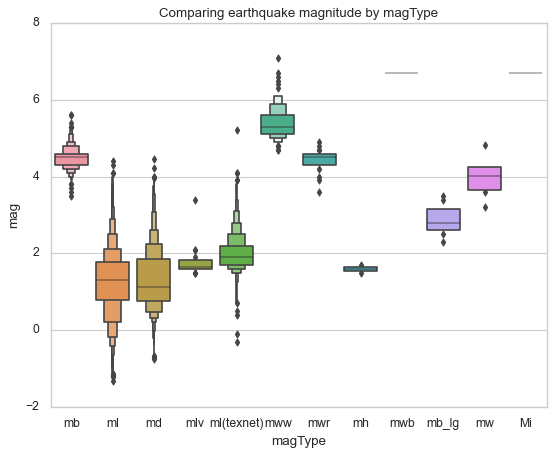

In [35]:
sns.boxenplot(
    x='magType', y='mag', data=df_quakes[['magType', 'mag']]
)
plt.title('Comparing earthquake magnitude by magType')

### violinplot()
Violin plots combine box plots and KDEs:

Text(0.5, 1.0, 'Comparing earthquake magnitude by magType')

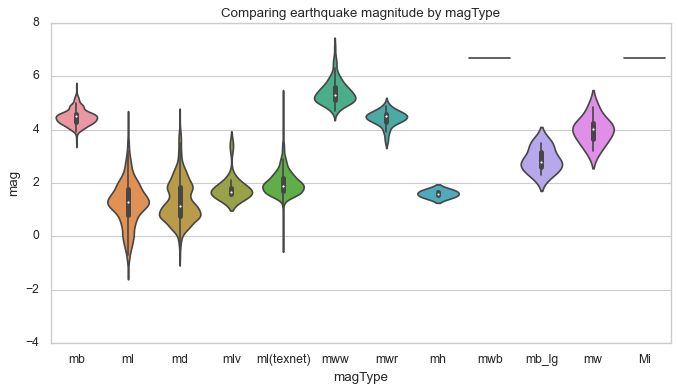

In [36]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.violinplot(
    x='magType', y='mag', data=df_quakes[['magType', 'mag']],  
    ax=axes, scale='width' # all violins have same width
)
plt.title('Comparing earthquake magnitude by magType')

### Correlations and Heatmaps

### heatmap()
We saw how to create a correlation matrix heatmap using pandas and matplotlib (check the previous notebook). An easier way is to use seaborn

<Axes: >

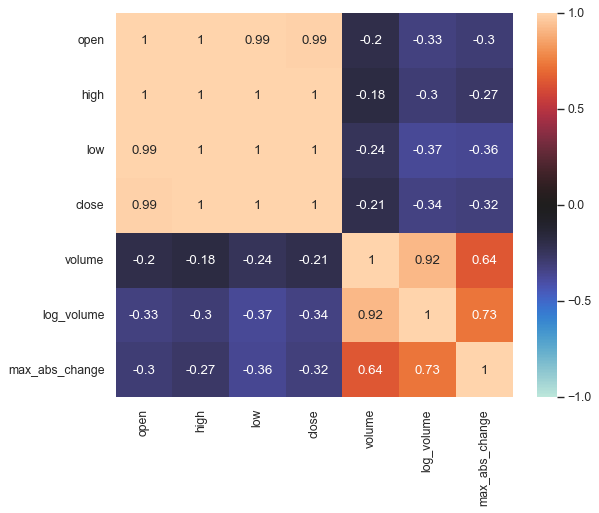

In [40]:
# Let's use the Facebook data to make a heatmap of the correlations btw the OHLC stock prices,
# the log of volume traded and the daily difference btw the highest and lowest prices

sns.heatmap(
    df_fb.sort_index().assign(
        log_volume=np.log(df_fb.volume),
        max_abs_change=df_fb.high - df_fb.low
    ).corr(),
    annot=True, center=0, vmin=-1, vmax=1 # center = 0 puts values of 0 (no correlation) at the center of the colormap
    # annot = true writes the correlation coefficient in each box
)

### pairplot()
The pair plot is seaborn's answer to the scatter matrix we saw earlier:

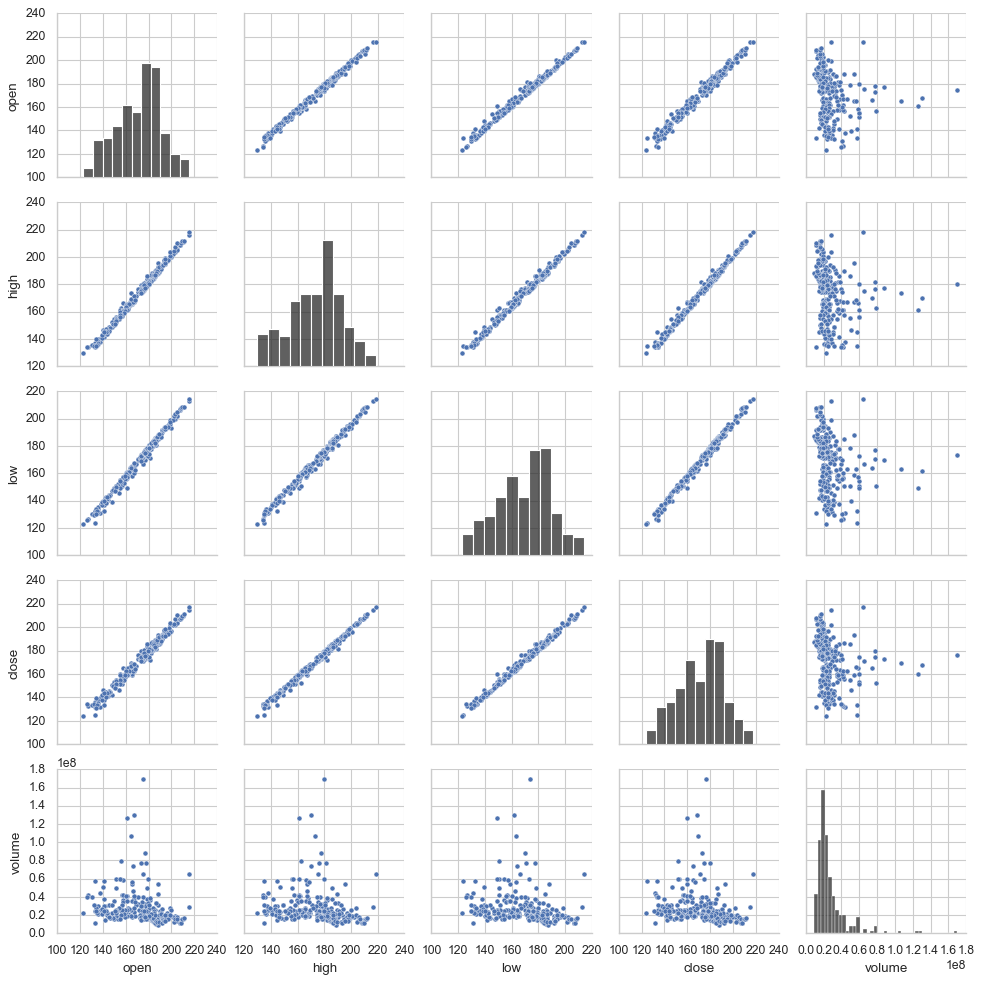

In [38]:
sns.pairplot(df_fb)

This result makes it easy to understand the near perfect positive correlation between the OHLC columns shown in the heatmap, while also showing histograms for each column along the diagonal.

Just as with pandas we can specify what to show along the diagonal; however, seaborn also allows us to color the data based on another column (or other data with the same shape).

Facebook's peformance in the latter half of 2018 was worse than in the first half, so we may be interested in seeing how the distribution of the data changed each quarter of the year. The `diag_kind` argument specify what to do along the diagonal, we can color everthing based on other data with the `hue` argument.

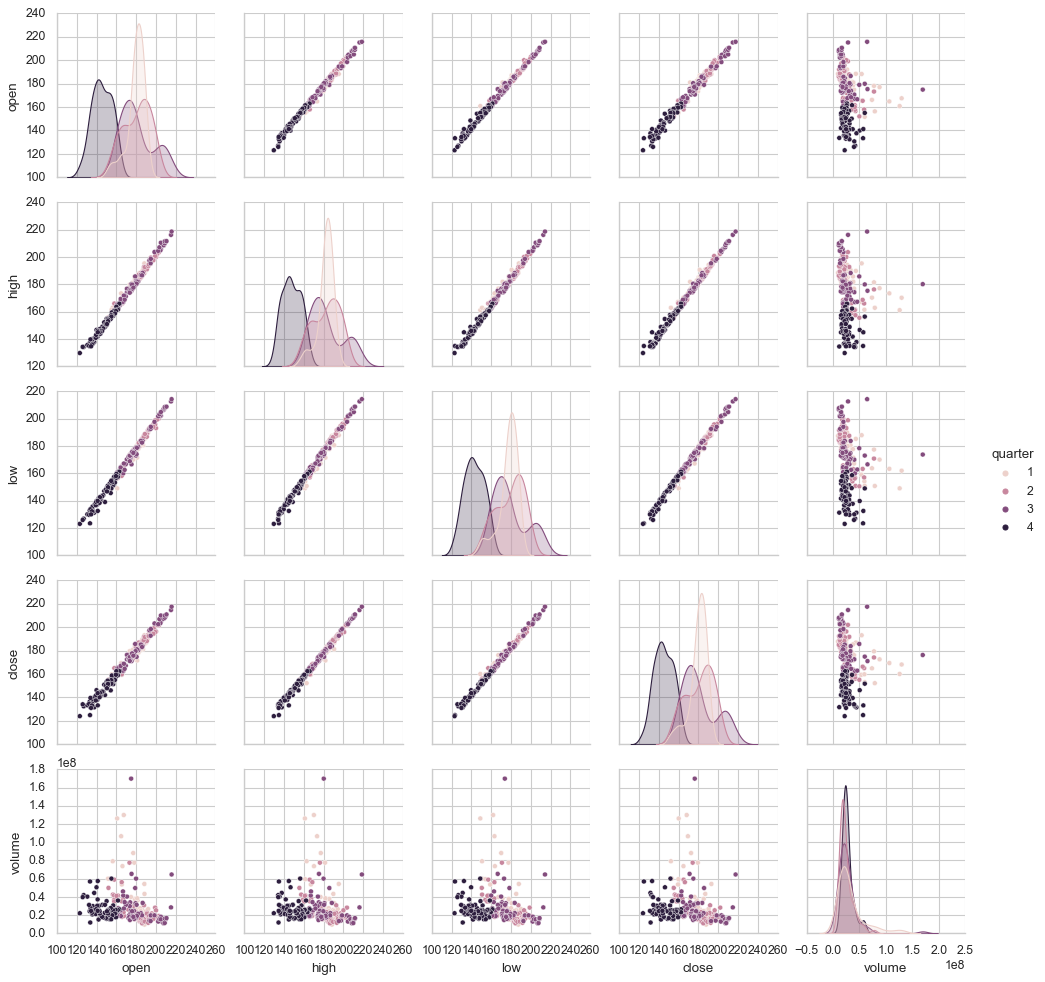

In [39]:
sns.pairplot(
    df_fb.assign(quarter=lambda x: x.index.quarter),
    diag_kind='kde',
    hue='quarter'
)


### jointplot()

The joint plot allows us to visualize the relationship between two variables, like a scatter plot. However, we get the added benefit of being able to visualize their distributions at the same time (as a histogram or KDE). The default options give us a scatter plot in the center and histograms on the sides:

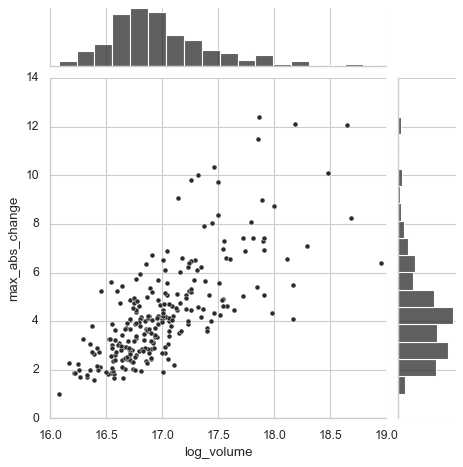

In [41]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    data=df_fb.assign(
        log_volume=np.log(df_fb.volume),
        max_abs_change=df_fb.high - df_fb.low
    )
)

We can pass `kind='hex'` for hexbins:

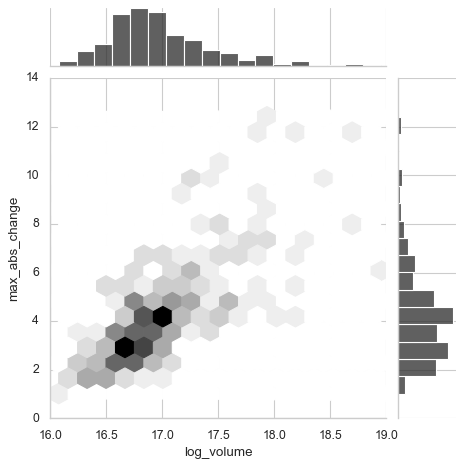

In [42]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    kind='hex',
    data=df_fb.assign(
        log_volume=np.log(df_fb.volume),
        max_abs_change=df_fb.high - df_fb.low
    )
)

If we pass `kind='kde'`, we get a contour plot of the joint density estimate with KDEs along the sides:

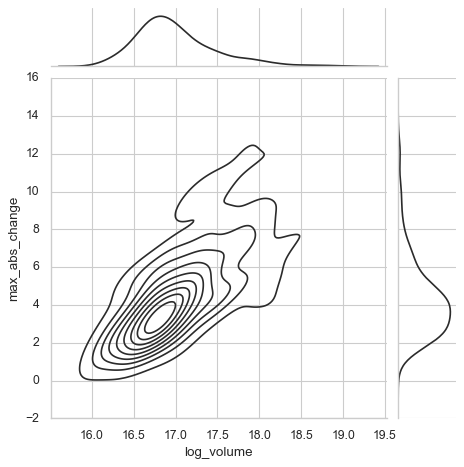

In [43]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    kind='kde',
    data=df_fb.assign(
        log_volume=np.log(df_fb.volume),
        max_abs_change=df_fb.high - df_fb.low
    )
)

If we specify `kind='reg'` instead, we get a regression line in the center and KDEs on the sides:

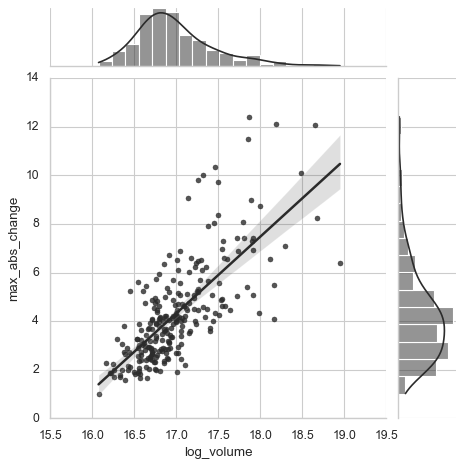

In [44]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    kind='reg',
    data=df_fb.assign(
        log_volume=np.log(df_fb.volume),
        max_abs_change=df_fb.high - df_fb.low
    )
)

# Resources:

https://seaborn.pydata.org/tutorial/introduction.html
https://seaborn.pydata.org/tutorial/aesthetics.html
https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html
https://wesmckinney.com/book/plotting-and-visualization#mpl_subplots_two

Hands-on Data Analysis with Pandas by Stefanie Molin
    